# S&P 500 Time Series Analysis and ARIMA Forecasting

## 1. Data Loading and Exploration
Loaded historical S&P 500 data from CSV.
Displayed basic info, head, descriptive statistics, checked for missing values, and listed columns.

## 2. Visualization
Plotted the 'Close' price to observe trends and patterns.
Grouped and visualized metrics by decade for long-term trends.

## 3. Stationarity Testing
Applied the Augmented Dickey-Fuller (ADF) test to the 'Close' price.
Result: The original series was non-stationary (high p-value).

## 4. Differencing
Created a differenced series (Close_diff) to remove trends and achieve stationarity.
Re-ran the ADF test on the differenced series.
Result: The differenced series was stationary (low p-value).

## 5. Model Order Selection
Plotted ACF and PACF of the differenced series to visually inspect autocorrelation and partial autocorrelation.
Discussed using grid search and AIC/BIC to select optimal ARIMA parameters (p, d, q).

## 6. ARIMA Modeling
Fit an ARIMA model to the stationary differenced series.
Printed model summary to review coefficients and diagnostics.

## 7. Forecasting
Generated forecasts for future S&P 500 values.
Converted forecasted differences back to actual close prices.

## 8. Validation
Downloaded real S&P 500 data for the forecast period using yfinance.
Compared forecasted values to actual values and calculated forecast errors.
Visualized forecast errors over time.

In [2]:
import pandas as pd

# Load the S&P 500 dataset
sp500 = pd.read_csv(f"{path}\\sp500.csv")

# Display basic info
print(sp500.info())
print(sp500.head())

# Describe numerical columns
print(sp500.describe())

# Check for missing values
print(sp500.isnull().sum())

# Show column names
print(sp500.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24532 entries, 0 to 24531
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    24532 non-null  object 
 1   Close   24532 non-null  float64
 2   High    24532 non-null  float64
 3   Low     24532 non-null  float64
 4   Open    24532 non-null  float64
 5   Volume  24532 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ MB
None
         Date      Close       High        Low       Open  Volume
0  12/30/1927  17.660000  17.660000  17.660000  17.660000       0
1    1/3/1928  17.760000  17.760000  17.760000  17.760000       0
2    1/4/1928  17.719999  17.719999  17.719999  17.719999       0
3    1/5/1928  17.549999  17.549999  17.549999  17.549999       0
4    1/6/1928  17.660000  17.660000  17.660000  17.660000       0
              Close          High           Low          Open        Volume
count  24532.000000  24532.000000  24532.000000  24532.00

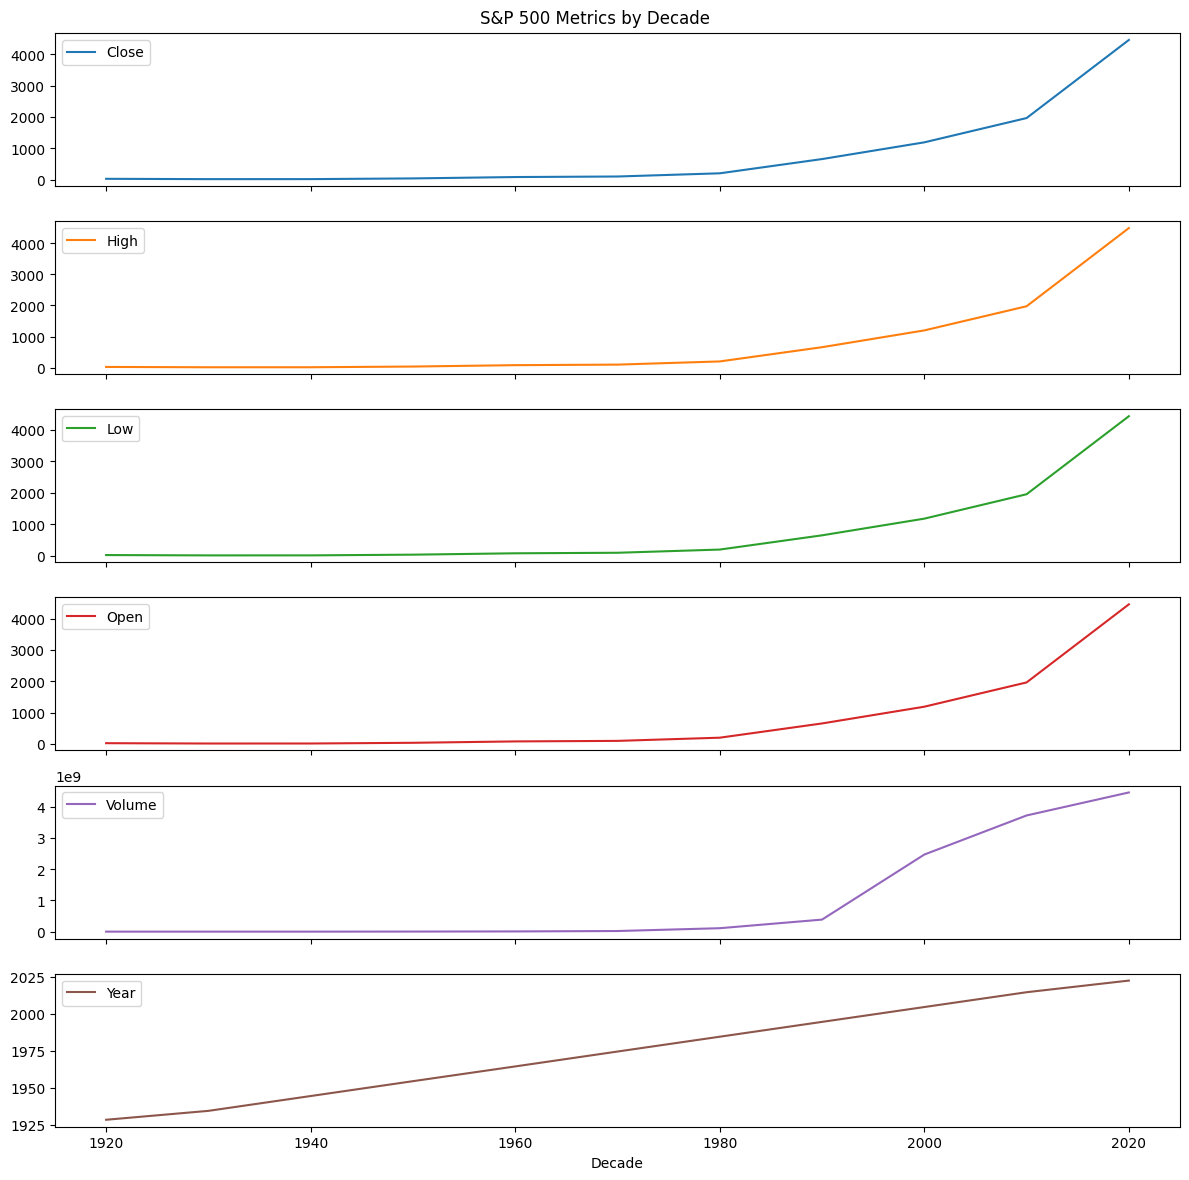

In [4]:
columns_to_plot = [col for col in sp500.columns if col not in ['Date', 'Decade']]
grouped = sp500.groupby('Decade')[columns_to_plot].mean()

grouped.plot(subplots=True, layout=(len(columns_to_plot), 1), figsize=(12, 2 * len(columns_to_plot)), title='S&P 500 Metrics by Decade')
plt.tight_layout()
plt.show()


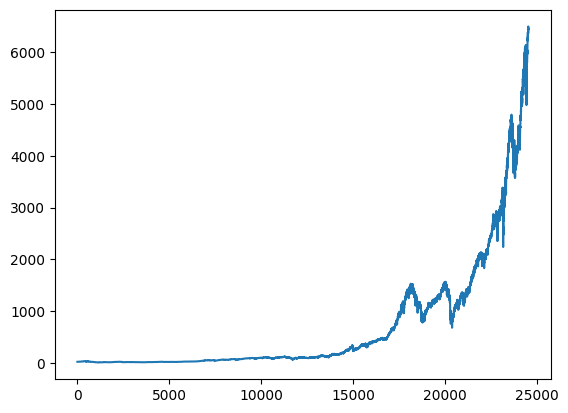

In [6]:
import matplotlib.pyplot as plt
sp500['Close'].plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(sp500['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 6.84448129960403
p-value: 1.0


In [11]:
sp500['Close_diff'] = sp500['Close'].diff().dropna()

In [13]:
result = adfuller(sp500['Close_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -23.706355303682944
p-value: 0.0


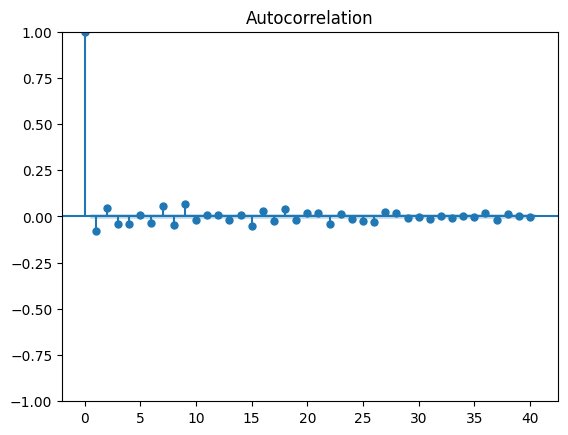

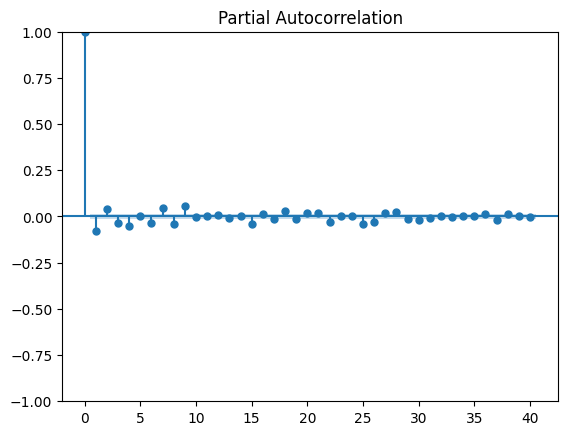

In [16]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sp500['Close_diff'].dropna(), lags=40)
plot_pacf(sp500['Close_diff'].dropna(), lags=40)
plt.show()

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sp500['Close_diff'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                24532
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -100907.125
Date:                Tue, 16 Sep 2025   AIC                         201820.249
Time:                        20:50:13   BIC                         201844.572
Sample:                             0   HQIC                        201828.129
                              - 24532                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0811      0.001    -71.897      0.000      -0.083      -0.079
ma.L1         -0.9993      0.000  -7527.697      0.000      -1.000      -0.999
sigma2       218.8957      0.281    778.814      0.0

In [19]:
# Get the last date and last close value
last_date = sp500['Date'].iloc[-1]
last_close = sp500['Close'].iloc[-1]

# Create new dates for the forecast (assuming business days)
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(forecast), freq='B')

# Convert forecasted differences to actual close prices
forecast_close = last_close + forecast.cumsum()

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast_Close': forecast_close})

print(forecast_df)

            Date  Forecast_Close
24532 2025-09-01     6465.665073
24533 2025-09-02     6467.258849
24534 2025-09-03     6469.161690
24535 2025-09-04     6471.039471
24536 2025-09-05     6472.919283
24537 2025-09-08     6474.798931
24538 2025-09-09     6476.678592
24539 2025-09-10     6478.558252
24540 2025-09-11     6480.437912
24541 2025-09-12     6482.317572


In [29]:
import yfinance as yf

# Download S&P 500 (^GSPC) data for the specified date range
real_sp500 = yf.download('^GSPC', start='2025-09-02', end='2025-09-13', progress=False)

# Reset index to get 'Date' as a column
real_sp500 = real_sp500.reset_index()[['Date', 'Close']]
print(real_sp500)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20216\3672235557.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  real_sp500 = yf.download('^GSPC', start='2025-09-02', end='2025-09-13', progress=False)


Price        Date        Close
Ticker                   ^GSPC
0      2025-09-02  6415.540039
1      2025-09-03  6448.259766
2      2025-09-04  6502.080078
3      2025-09-05  6481.500000
4      2025-09-08  6495.149902
5      2025-09-09  6512.609863
6      2025-09-10  6532.040039
7      2025-09-11  6587.470215
8      2025-09-12  6584.290039


In [ ]:
import numpy as np

# Align forecast_df and real_sp500 on dates
# Flatten MultiIndex columns if present
real_sp500_renamed = real_sp500.copy()
real_sp500_renamed.columns = ['Date', 'Real_Close']

# Merge forecast_df and real_sp500_renamed on 'Date'
merged = pd.merge(forecast_df, real_sp500_renamed, on='Date', how='inner')

# Create truth set: columns are [Forecast_Close, Real_Close, Error]
truth_matrix = merged[['Forecast_Close', 'Real_Close']].copy()
truth_matrix['Error'] = truth_matrix['Forecast_Close'] - truth_matrix['Real_Close']

print(truth_matrix)

   Forecast_Close   Real_Close       Error
0     6467.258849  6415.540039   51.718810
1     6469.161690  6448.259766   20.901925
2     6471.039471  6502.080078  -31.040608
3     6472.919283  6481.500000   -8.580717
4     6474.798931  6495.149902  -20.350972
5     6476.678592  6512.609863  -35.931272
6     6478.558252  6532.040039  -53.481787
7     6480.437912  6587.470215 -107.032303
8     6482.317572  6584.290039 -101.972467


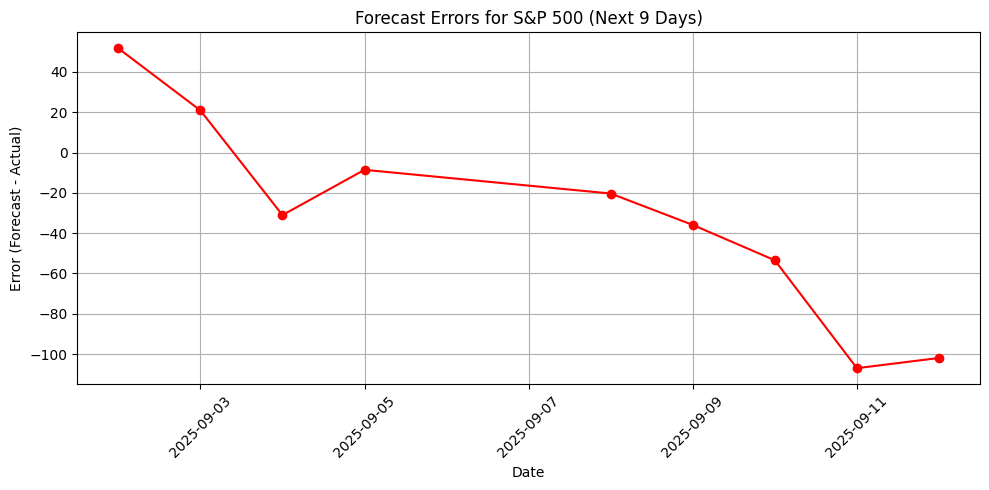

In [32]:
import matplotlib.pyplot as plt

# Use the aligned dates and errors from truth_matrix
plt.figure(figsize=(10, 5))
plt.plot(merged['Date'], truth_matrix['Error'], marker='o', linestyle='-', color='red')
plt.title('Forecast Errors for S&P 500 (Next 9 Days)')
plt.xlabel('Date')
plt.ylabel('Error (Forecast - Actual)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()